# Judul Proyek
```
**Proyek ini bertujuan untuk menganalisis sinyal Electrocardiogram (ECG) dengan mengidentifikasi perbedaan antara sinyal normal dan abnormal.**
```

Sumber Data: (https://www.physionet.org/content/mitdb/1.0.0/) dan (https://physionet.org/content/nsrdb/1.0.0/)



**Anggota Kelompok:**
1. Muhammad Rarendra Satiya (23031554117)
2. Theopan Gerrard N (23031554227)
3. Andrian Simanjuntak (23031554146)


## Akuisisi Data

```
Berikan penjelasan tentang sinyal tersebut.

Sinyal yang kelompok kami ambil adalah sinyal ECG jantung Mengecekan malalui 2 yaitu MLII(modifed lead II) dan V5
Sinyal yang saya ambil adalah gambaran dari dalam 1 dataset merupakan satu pasien yang sinyal ritme jantung direkam selama beberapa jam
yang MLII: Elektroda positif diletakkan di pergelangan kaki kiri (atau kaki kiri bagian bawah), Elektroda negatif diletakkan di tangan kanan. V5 Lantai kelima pada garis anterior aksilaris kiri (antara tulang rusuk).
informasi yang bisa diambil pada sinyal adalah dari
gelombang P: aktivitas kontraksi atrium yang mendorong darah ke ventrikel.
gelombang QRS: kontraksi ventrikel yang memompa darah ke seluruh tubuh (juga dikenal sebagai fase sistolik).
gelombang T: aktivitas repolarisasi (pemulihan) ventrikel setelah kontraksi.

Perbedaan yang bisa diambil dari sinyal yang UBnormal(Jantung Aritmia dan Jantung Normal Sinus) Dari Jarak Interval R-Peaks, BPM, Q, S
```

## Visualisasi Sinyal

Import Dataser Siyal ECG

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
import wfdb
import pandas as pd
from scipy.signal import spectrogram

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
import wfdb
import pandas as pd


record_name = r'C:\Users\RENDRA\OneDrive\Documents\PSD\100'

signal_data, fields = wfdb.rdsamp(record_name)

column_names = fields['sig_name']

df1 = pd.DataFrame(signal_data, columns=column_names)
sampling_rate = 360 #memerlukan resolusi lebih tinggi untuk deteksi kelainan.

df1['time_ms'] = (df1.index / sampling_rate) * 1000 #dikali dengan 1000 miliseken

normal_record = r'C:\Users\RENDRA\OneDrive\Documents\PSD\16265'
signal_data, fields = wfdb.rdsamp(normal_record)

column_names = fields['sig_name']

df2 = pd.DataFrame(signal_data, columns=column_names)
sampling_rate2 = 128 #memiliki bentuk yang lebih sederhana, sehingga resolusi lebih rendah sudah memadai.

df2['time_ms'] = (df2.index / sampling_rate2) * 1000 #dikali dengan 1000 miliseken

df1


,MLII,V5,time_ms
0,-0.145,-0.065,0.000000e+00
1,-0.145,-0.065,2.777778e+00
2,-0.145,-0.065,5.555556e+00
3,-0.145,-0.065,8.333333e+00
4,-0.145,-0.065,1.111111e+01
...,...,...,...
649995,-0.075,-0.480,1.805542e+06
649996,-0.445,-0.410,1.805544e+06
649997,-0.675,-0.365,1.805547e+06
649998,-0.765,-0.335,1.805550e+06


In [26]:
df2

,ECG1,ECG2,time_ms
0,-0.165,-0.325,0.000000e+00
1,-0.155,-0.325,7.812500e+00
2,-0.195,-0.305,1.562500e+01
3,-0.205,-0.305,2.343750e+01
4,-0.185,-0.295,3.125000e+01
...,...,...,...
11730939,-0.050,-0.095,9.164796e+07
11730940,-0.050,-0.085,9.164797e+07
11730941,-0.050,-0.095,9.164798e+07
11730942,-0.050,-0.085,9.164798e+07


```
Sinyal elektrokardiogram (ECG) adalah representasi grafis dari
aktivitas listrik jantung yang dapat digunakan untuk
mendiagnosis berbagai kondisi kardiovaskular, sinyal ECG
dilakukan sample selama 10 detik dengan Frekuensi sampling yang
diambil per detik dari sinyal analog untuk mengubahnya menjadi sinyal digital. Dalam konteks ini,
frekuensi sampling untuk sinyal ECG normal
ditetapkan pada 128 Hz, sedangkan untuk sinyal ECG abnormal ditetapkan pada 360 Hz.
```

### **Domain Waktu**

### **Visualisasi Sinyal ECG (Normal dan Abnormal)**

1. **Plotting Sinyal ECG Normal dan Abnormal:**

   Dalam kode ini, kita memplotkan dua sinyal ECG yang berbeda:
   - **Sinyal ECG Normal (MlII)** yang menggunakan `MlII_normal` sebagai data.
   - **Sinyal ECG Abnormal (MlII)** yang menggunakan `MlII_UBnormal` sebagai data.

   Persamaan untuk plotting sinyal ECG adalah sebagai berikut:

   - **ECG Normal**:
   $$
   \text{ECG}_{\text{Normal}}(t) = \text{MlII}_{\text{normal}}(t)
   $$

   - **ECG Abnormal**:
   $$
   \text{ECG}_{\text{Abnormal}}(t) = \text{MlII}_{\text{UBnormal}}(t)
   $$

2. **Pengaturan Plot**:

   - Waktu (\(t\)) dihitung menggunakan waktu sampling dan total waktu (10 detik dalam kasus ini):
     $$ 
     t = \frac{\text{Index}}{f_s} 
     $$
     Di mana:
     - \( f_s \) adalah frekuensi sampling (128 Hz untuk sinyal normal dan 360 Hz untuk sinyal abnormal),
     - **Index** adalah indeks waktu pada data.

   - **Plot untuk ECG Normal**:
     Sinyal ECG normal diplot dengan label "ECG Normal - MlII" pada grafik dengan warna biru.

   - **Plot untuk ECG Abnormal**:
     Sinyal ECG abnormal diplot dengan label "ECG Abnormal - MlII" pada grafik dengan warna merah.

   Kedua grafik ini menggambarkan hubungan antara waktu dan amplitudo sinyal ECG.

### **Ringkasan Rumus Plotting**:

1. **Plotting ECG Normal**:
   $$
   \text{ECG}_{\text{Normal}}(t) = \text{MlII}_{\text{normal}}(t)
   $$

2. **Plotting ECG Abnormal**:
   $$
   \text{ECG}_{\text{Abnormal}}(t) = \text{MlII}_{\text{UBnormal}}(t)
   $$

3. **Penghitungan Waktu**:
   $$
   t = \frac{\text{Index}}{f_s}
   $$

Dimana:
- \( t \) adalah waktu pada setiap titik data,
- \( f_s \) adalah frekuensi sampling.


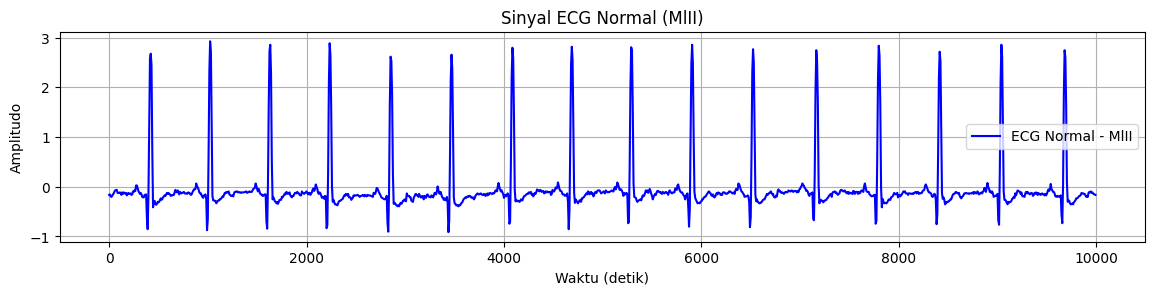

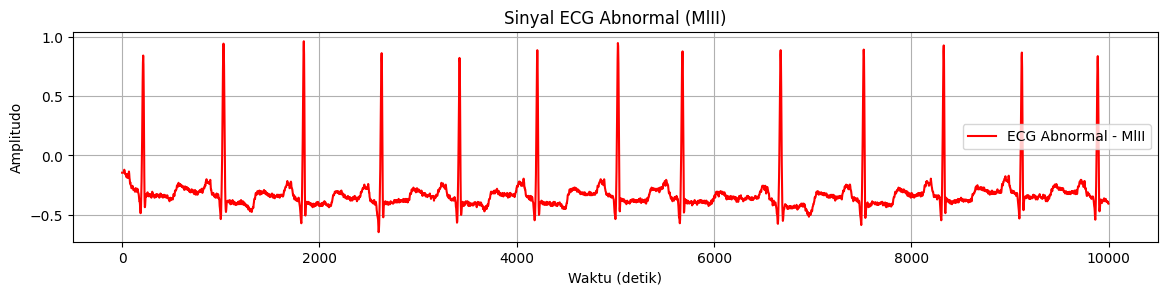

In [27]:
time=10
sampling_rate_abnormla= 360
sampling_rate_normal=128
MlII_normal=df2[0:time*sampling_rate_normal]['ECG1'].values
MlII_UBnormal=df1[0:time*sampling_rate_abnormla]['MLII'].values

V5_normal=df2[0:time*sampling_rate_normal]['ECG2'].values
V5_UBnormal=df1[0:time*sampling_rate_abnormla]['V5'].values

t1 = df1[0: time*sampling_rate_abnormla]["time_ms"].values
t2=df2[0: time*sampling_rate_normal]['time_ms'].values

# df_normal = pd.DataFrame({
#     'time_ms': t2,
#     'ECG1': MlII_normal,
#     'ECG2': V5_normal
# })

# df_abnormal = pd.DataFrame({
#     'time_ms': t1,
#     'MlII_normal': MlII_UBnormal,
#     'V5 normal': V5_UBnormal
# })

# df_abnormal
# Plot ECG Normal
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(t2, MlII_normal, label="ECG Normal - MlII", color='blue')
plt.title("Sinyal ECG Normal (MlII)")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.grid()
plt.legend()

# Plot ECG Abnormal
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(t1, MlII_UBnormal, label="ECG Abnormal - MlII", color='red')
plt.title("Sinyal ECG Abnormal (MlII)")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.grid()
plt.legend()

```
Sumbu X: Menunjukkan waktu dalam detik. Dalam grafik, ini menunjukkan durasi sinyal ECG.
Sumbu Y: Menunjukkan amplitudo, yang mencerminkan kekuatan sinyal listrik yang dihasilkan oleh jantung.
```

### Domain Frekuensi

### Rumus FFT dan Frekuensi Spektrum

1. **Transformasi Fourier (FFT)**:
   
   Fungsi `fft(signal)` menghitung Transformasi Fourier Diskrit (DFT) dari sinyal diskrit \( x[n] \), yang didefinisikan sebagai:

   $$
   X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-\frac{2\pi i}{N} k n}, \quad k = 0, 1, 2, \dots, N-1
   $$

   Di mana:
   - \( x[n] \) adalah sinyal input pada indeks waktu \( n \),
   - \( X[k] \) adalah komponen spektrum frekuensi pada indeks \( k \),
   - \( N \) adalah panjang sinyal,
   - \( i \) adalah bilangan imajiner, dengan \( i = $$\sqrt{-1} $$\).

2. **Frekuensi Diskrit (Menggunakan `fftfreq`)**:

   Fungsi `fftfreq(len(signal), T)` menghitung **frekuensi diskrit** untuk setiap komponen dari hasil FFT. Frekuensi \( f_k \) untuk indeks \( k \) dapat dihitung dengan rumus:

   $$
   f_k = \frac{k}{N \cdot T}, \quad k = 0, 1, 2, \dots, N-1
   $$

   Di mana:
   - \( k \) adalah indeks hasil FFT,
   - \( N \) adalah panjang sinyal,
   - \( T \) adalah interval waktu antar sampel (dalam hal ini \( T = $$\frac{1}{f_s}$$ \), dengan \( f_s \) adalah frekuensi sampel).

3. **Magnitude dari FFT**:

   Setelah menghitung FFT, kita dapat menghitung magnitude dari komponen frekuensi dengan rumus:

   $$
   |X[k]| = \sqrt{ \text{Re}(X[k])^2 + \text{Im}(X[k])^2 }
   $$

   Di mana:
   - \( $$\text{Re}(X[k])$$ \) adalah bagian real dari \( X[k] \),
   - \( $$\text{Im}(X[k]) $$\) adalah bagian imajiner dari \( X[k] \).

4. **Normalisasi Magnitude**:

   Magnitude hasil FFT biasanya dinormalisasi dengan membagi dengan panjang sinyal \( N \) untuk mendapatkan energi per unit frekuensi:

   $$
   \text{Magnitude Normalized} = \frac{2.0}{N} \cdot |X[k]|
   $$

   Dengan tujuan untuk mengurangi efek panjang sinyal pada hasil magnitude, sehingga spektrum frekuensi lebih mudah dibandingkan.


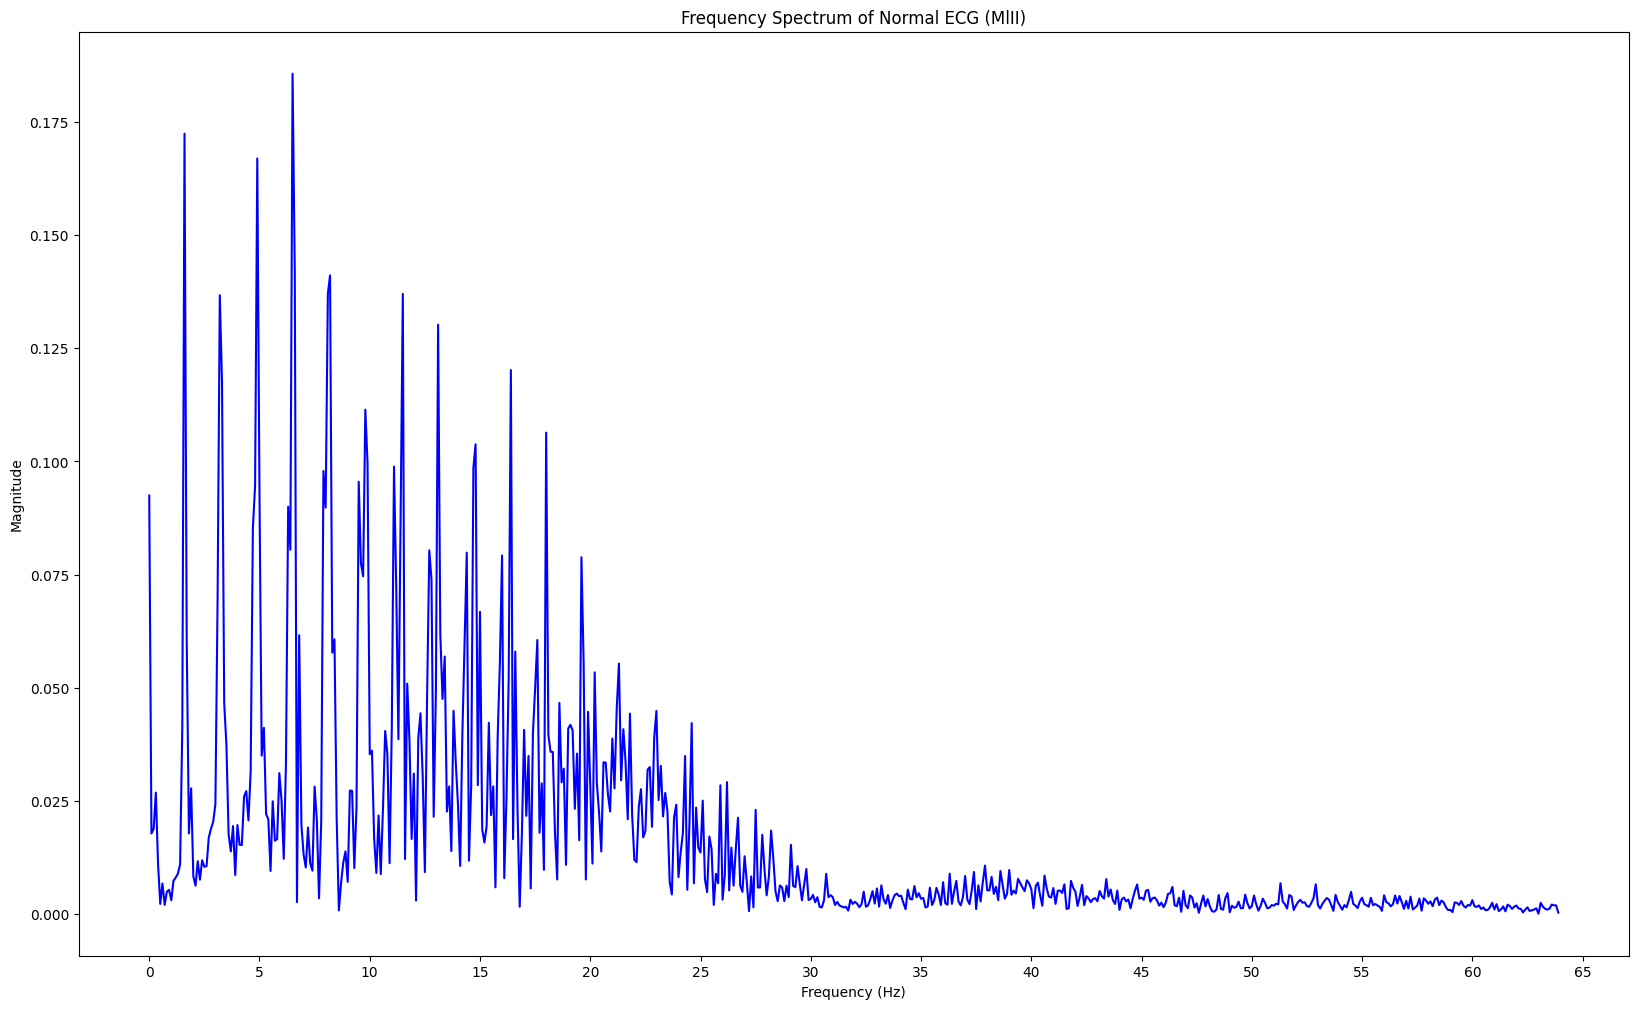

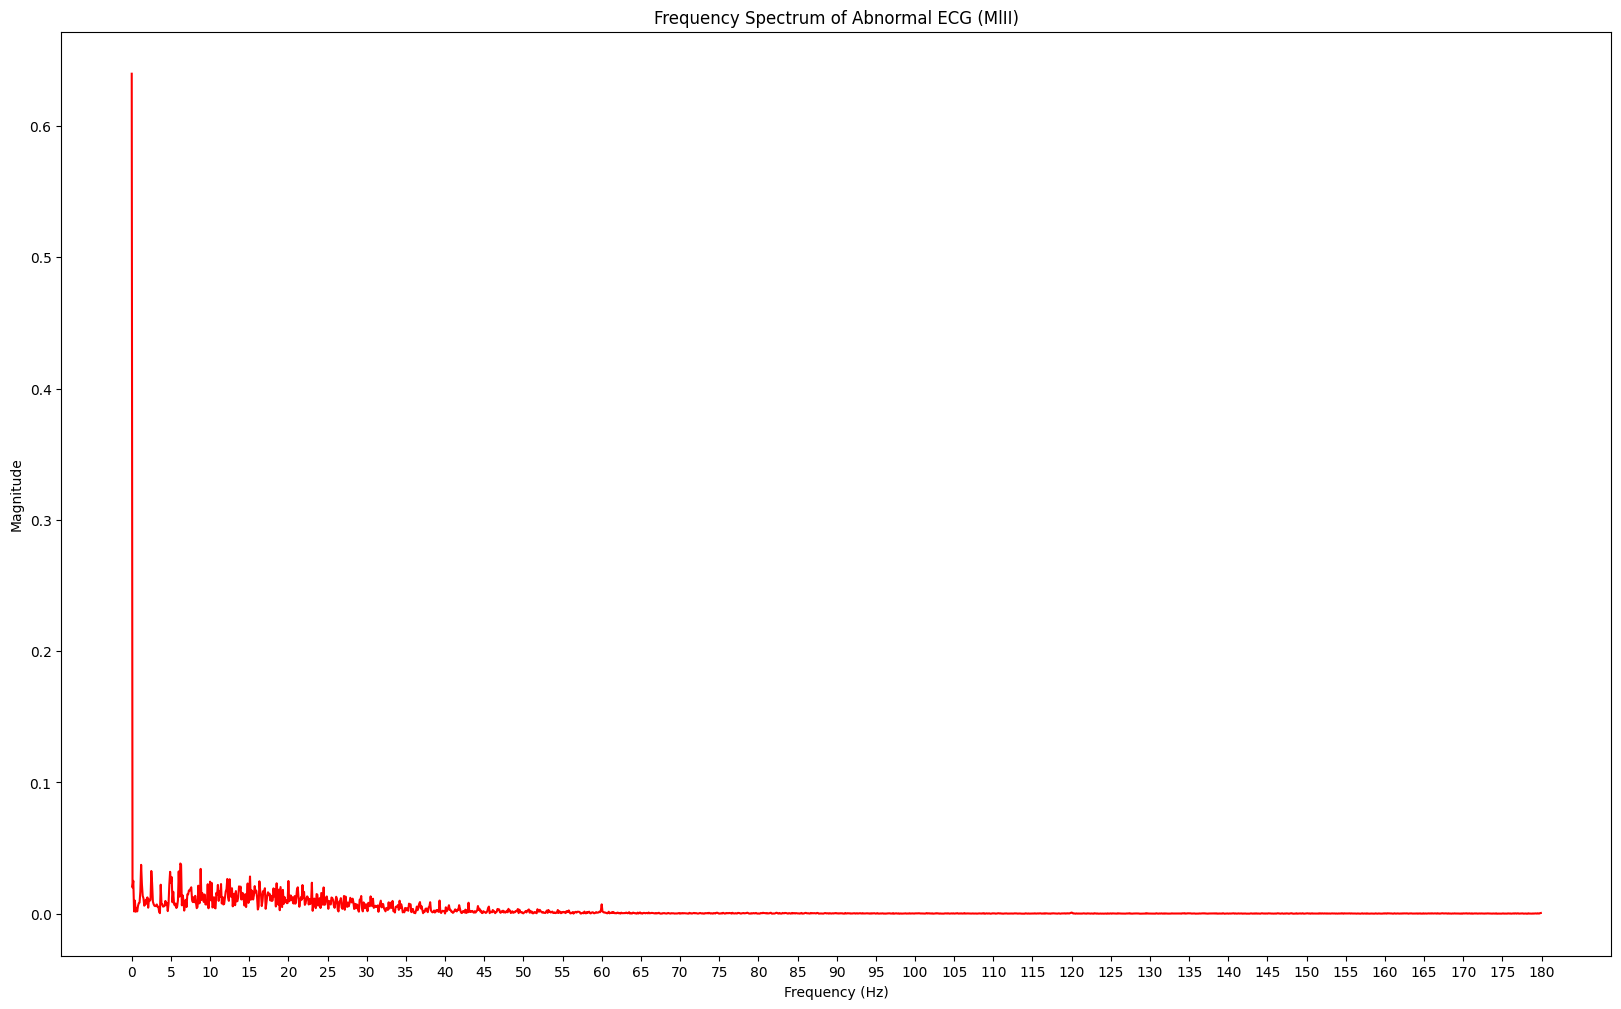

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def plot_frequency_spectrum(signal, fs, title, color):
    T = 1.0 / fs
    yf = fft(signal)
    xf = fftfreq(len(signal), T)[:len(signal) // 2]
    plt.figure(figsize=(20, 12))
    plt.plot(xf, 2.0 / len(signal) * np.abs(yf[:len(signal) // 2]), color=color)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xticks(np.arange(0, np.max(xf) + 5, 5))
    plt.title(title)
    plt.show()

# Plotting for MlII (Normal ECG)
norm_freq_mlii= plot_frequency_spectrum(MlII_normal, sampling_rate_normal, 'Frequency Spectrum of Normal ECG (MlII)', 'blue')
norm_freq_mlii
# Plotting for MlII (UBNormal ECG)
ubnorm_freq_mlii= plot_frequency_spectrum(MlII_UBnormal, sampling_rate_abnormla, 'Frequency Spectrum of Abnormal ECG (MlII)', 'red')
ubnorm_freq_mlii

```
Domain Frekuensi diatas Sumbu X sebagai Frekuensi dari sinyal ECG tersebut.
sumbu Y = Amplitudo mencerminkan kekuatan pada sinyal

MLII Normal= terjadi Baseline drift pada frekuensi 0hz hal ini kemungkinan  disebabkan oleh gerakan saat bernapas, gerakan pasien, kontak yang buruk antara kabel elektroda dan peralatan perekaman ECG, persiapan kulit yang tidak memadai di tempat elektroda dipasang, dan elektroda yang kotor, dan kemungkinan terjadinya Artefak Otot karena Kenaikan amplitudo di atas 30 Hz dapat menunjukkan aktivitas listrik yang dihasilkan oleh kontraksi otot dada.Artefak otot biasanya muncul pada frekuensi yang lebih tinggi, sering kali di atas 20 Hz, dan dapat mencapai beberapa kHz.

MLII Abnormal=pada gambar dominan frekuensi mengindikasi terjadinya baseline drift karena ada kenaikan amplitude sangat singnifikan pada frekuensi 0hz yang disebabkan oleh gerakan saat bernapas, gerakan pasien, kontak yang buruk antara kabel elektroda dan peralatan perekaman ECG, dan terjadinya Noise dari perangkat listrik di sekitar, seperti power line interference, dapat muncul pada frekuensi 50/60 Hz, Atau juga Pergerakan dan ketegangan otot yang menyebabkan Artefak Otot

```



## Pra-Pemrosesan

```
jelaskan langkah-langkah pra-pemrosesan yang diperlukan untuk mengolah sinyal tersebut. Misalkan filtering, normalisasi, dsb. Sesuaikan dengan kebutuhan tiap proyek.

tahap Preprosesing dengan menggunakan metode algoritma berbasis local maximum detection untuk medeteksi R-Peaks untuk tahapan sendri.
```
1. Filtering= dilakukan guna untuk menghilangkan noise atau komponen sinyal yang tidak diperlukan dalam sinyal, biasanya sinyal ECG noise dari Baseline drift, Kontraksi Otot, dan Kejutan dari elektrodanya
2. Normalisasi= Melakukan normalisasi menjadikan sinyal menjadi range (0-1), artinya data
sinyal antara angka 0 sampai dengan 1
3. Feature Ekstraksi= mendapatkan Fitur-fitur dari sinyal ECG dengan Metode local maximum detection

### Filtering

### **Domain Waktu Filter**

### Rumus untuk Filter Digital

1. **Bandpass Filter**:

   Bandpass filter hanya mengizinkan frekuensi dalam rentang antara dua frekuensi pemotongan, yaitu **low_cutoff** dan **high_cutoff**. Fungsi transfer untuk bandpass filter adalah sebagai berikut:

   $$
   H(f) = \frac{b(f)}{a(f)}
   $$

   Di mana \( b(f) \) dan \( a(f) \) adalah koefisien filter yang dihitung berdasarkan frekuensi pemotongan yang sudah dinormalisasi.

2. **Bandstop Filter**:

   Bandstop filter digunakan untuk menghilangkan sinyal dalam rentang frekuensi tertentu. Fungsi transfer untuk bandstop filter adalah:

   $$
   H(f) = \frac{b(f)}{a(f)}
   $$

   Frekuensi pemotongan untuk bandstop filter adalah:

   $$
   f_{\text{low}} = \text{low\_cutoff} \quad \text{dan} \quad f_{\text{high}} = \text{high\_cutoff}
   $$

3. **Lowpass Filter**:

   Lowpass filter hanya mengizinkan frekuensi di bawah **cutoff** untuk lewat. Fungsi transfer untuk lowpass filter adalah:

   $$
   H(f) = \frac{b(f)}{a(f)}
   $$

   Dengan cutoff **cutoff** yang dinormalisasi menjadi \( f_{\text{normal}} = \frac{\text{cutoff}}{f_s/2} \), di mana \( f_s \) adalah frekuensi sampel.

   $$
   f_{\text{cutoff}} = \text{cutoff}
   $$

4. **Highpass Filter**:

   Highpass filter hanya mengizinkan frekuensi yang lebih tinggi dari **cutoff** untuk lewat. Fungsi transfer untuk highpass filter adalah:

   $$
   H(f) = \frac{b(f)}{a(f)}
   $$

   Dengan cutoff **cutoff** yang dinormalisasi menjadi \( f_{\text{normal}} = \frac{\text{cutoff}}{f_s/2} \), di mana \( f_s \) adalah frekuensi sampel.

   $$
   f_{\text{cutoff}} = \text{cutoff}
   $$

5. **Koefisien Filter Butterworth**:

   Untuk menghitung koefisien filter untuk semua jenis filter di atas (bandpass, bandstop, lowpass, highpass), kita menggunakan filter **Butterworth**, yang dihitung dengan fungsi `butter()` dari `scipy.signal`. Koefisien filter dihitung berdasarkan urutan filter dan frekuensi pemotongan yang dinormalisasi.

   $$
   H(f) = \frac{b(f)}{a(f)} = \frac{1}{(1 + (f/f_c)^{2n})}
   $$

   Di mana:
   - \( f_c \) adalah frekuensi cutoff,
   - \( n \) adalah urutan filter.


Bandpass Filter Cutoff Frequencies: Low = 0.5 Hz, High = 50 Hz
Normalized Cutoff Frequencies: Low = 0.0078125, High = 0.78125
Bandstop Filter Cutoff Frequencies: Low = 59 Hz, High = 63 Hz
Normalized Cutoff Frequencies: Low = 0.3277777777777778, High = 0.35
Bandpass Filter Cutoff Frequencies: Low = 0.5 Hz, High = 50 Hz
Normalized Cutoff Frequencies: Low = 0.002777777777777778, High = 0.2777777777777778


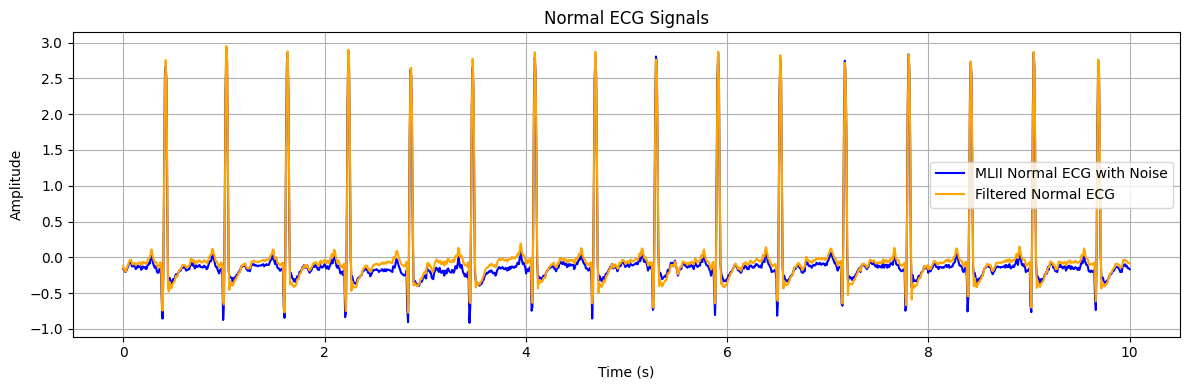

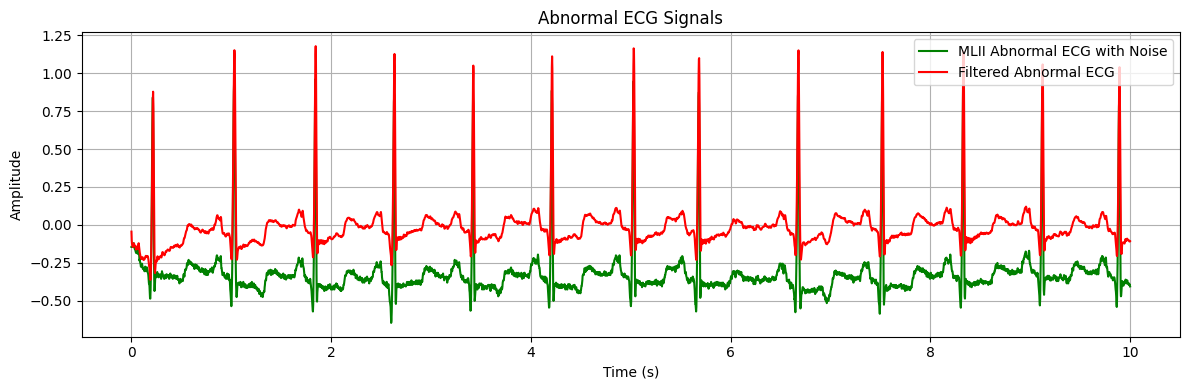

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

def bandpass_filter(signal, fs, low_cutoff, high_cutoff):
    nyquist = 0.5 * fs
    low = low_cutoff / nyquist
    high = high_cutoff / nyquist
    print(f"Bandpass Filter Cutoff Frequencies: Low = {low_cutoff} Hz, High = {high_cutoff} Hz")
    print(f"Normalized Cutoff Frequencies: Low = {low}, High = {high}")

    if low <= 0 or high >= 1 or low >= high:
        raise ValueError("Invalid cutoff frequencies for bandpass filter.")

    b, a = butter(1, [low, high], btype='band')
    filtered_signal = lfilter(b, a, signal)

    return filtered_signal

def bandstop_filter(signal, fs, low_cutoff, high_cutoff,order):
    nyquist = 0.5 * fs
    low = low_cutoff / nyquist
    high = high_cutoff / nyquist
    print(f"Bandstop Filter Cutoff Frequencies: Low = {low_cutoff} Hz, High = {high_cutoff} Hz")
    print(f"Normalized Cutoff Frequencies: Low = {low}, High = {high}")

    if low <= 0 or high >= 1 or low >= high:
        raise ValueError("Invalid cutoff frequencies for bandstop filter.")

    b, a = butter(order, [low, high], btype='bandstop')
    filtered_signal = lfilter(b, a, signal)

    return filtered_signal

def lowpass_filter(signal, fs, cutoff):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist

    print(f"Lowpass Filter Cutoff Frequency: {cutoff} Hz")
    print(f"Normalized Cutoff Frequency: {normal_cutoff}")

    if normal_cutoff <= 0 or normal_cutoff >= 1:
        raise ValueError("Invalid cutoff frequency for lowpass filter.")

    b, a = butter(1, normal_cutoff, btype='low')
    filtered_signal = lfilter(b, a, signal)

    return filtered_signal
def highpass_filter(signal, fs, cutoff):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(1, normal_cutoff, btype='high')
    filtered_signal = lfilter(b, a, signal)
    return filtered_signal


# filter_lowerpass_normal = lowpass_filter(MlII_normal, sampling_rate_normal,35)
filtered_bandpass_normal = bandpass_filter(MlII_normal, sampling_rate_normal, 0.5,50)


# filtered_lowpass_abnormal = highpass_filter(MlII_UBnormal, sampling_rate_abnormla, 0.5)
filtered_bandstop_abnormal = bandstop_filter(MlII_UBnormal, sampling_rate_abnormla, 59,63,1)
filtered_bandpass_abnormal= bandpass_filter(filtered_bandstop_abnormal,sampling_rate_abnormla,0.5,50)

t_normal = np.linspace(0, time, len(MlII_normal))
t_abnormal = np.linspace(0, time, len(MlII_UBnormal))


plt.figure(figsize=(12, 4))

# Raw Normal ECG with Noise
plt.plot(t_normal, MlII_normal, label='MLII Normal ECG with Noise', color='blue')
# Filtered Normal ECG
plt.plot(t_normal, filtered_bandpass_normal, label='Filtered Normal ECG', color='orange')

plt.title('Normal ECG Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))

plt.plot(t_abnormal, MlII_UBnormal, label='MLII Abnormal ECG with Noise', color='green')

plt.plot(t_abnormal, filtered_bandpass_abnormal, label='Filtered Abnormal ECG', color='red')

plt.title('Abnormal ECG Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# plot_frequency_spectrum(filtered_lowpass_abnormal, sampling_rate_abnormla, 'Frequency Spectrum of Filtered Abnormal ECG (MlII)', 'red')

### **Domain Frekuensi Filter**

### 1. **Transformasi Fourier (FFT)**

Transformasi Fourier digunakan untuk mengubah sinyal waktu (time-domain) menjadi domain frekuensi (frequency-domain). Fungsi **FFT** pada kode digunakan untuk menghitung **Fast Fourier Transform** (FFT) dari sinyal:

$$
\text{FFT}(x(t)) = X(f) = \int_{-\infty}^{\infty} x(t) e^{-j2\pi f t} dt
$$

Di mana:
- \( x(t) \) adalah sinyal dalam domain waktu,
- \( X(f) \) adalah sinyal dalam domain frekuensi,
- \( f \) adalah frekuensi.

### 2. **Frekuensi Diskret (FFT Frequencies)**

Setelah melakukan FFT pada sinyal, kita mendapatkan spektrum frekuensi. Fungsi **fftfreq** digunakan untuk menghitung frekuensi diskret yang sesuai dengan panjang sinyal \( N \) dan sampling rate \( fs \). Persamaannya adalah:

$$
f_n = \frac{n}{T \cdot N} \quad \text{untuk} \quad n = 0, 1, 2, ..., N-1
$$

Di mana:
- \( f_n \) adalah frekuensi pada index \( n \),
- \( N \) adalah jumlah total sampel pada sinyal,
- \( T \) adalah waktu periode sampling (\( T = \frac{1}{fs} \)),
- \( fs \) adalah sampling rate.

### 3. **Spektrum Frekuensi (Magnitude Spectrum)**

Spektrum frekuensi dihitung sebagai magnitudo dari hasil FFT yang dibagi dengan panjang sinyal untuk menormalkan amplitudo. Magnitudo ini menunjukkan kekuatan komponen frekuensi pada sinyal:

$$
\text{Magnitude Spectrum} = \frac{2}{N} \cdot |X(f)|
$$

Di mana:
- \( |X(f)| \) adalah magnitudo dari hasil FFT pada frekuensi \( f \),
- \( N \) adalah jumlah sampel pada sinyal.

Pada kode, rumus ini diterapkan pada bagian `2.0 / len(signal) * np.abs(yf[:len(signal) // 2])`.

### 4. **Plot Spektrum Frekuensi**

Plotting hasil spektrum frekuensi dilakukan dengan fungsi `plot_frequency_spectrum` yang memplot hubungan antara frekuensi dan magnitudo sinyal. Di mana:

$$
\text{Plot} = f(f_n, \text{Magnitude Spectrum})
$$

### Ringkasan Rumus:

1. **FFT**:
   $$
   X(f) = \int_{-\infty}^{\infty} x(t) e^{-j2\pi f t} dt
   $$

2. **Frekuensi Diskret**:
   $$
   f_n = \frac{n}{T \cdot N} \quad \text{untuk} \quad n = 0, 1, 2, ..., N-1
   $$

3. **Magnitude Spectrum**:
   $$
   \text{Magnitude Spectrum} = \frac{2}{N} \cdot |X(f)|
   $$

4. **Plot**:
   $$
   \text{Plot} = f(f_n, \text{Magnitude Spectrum})
   $$


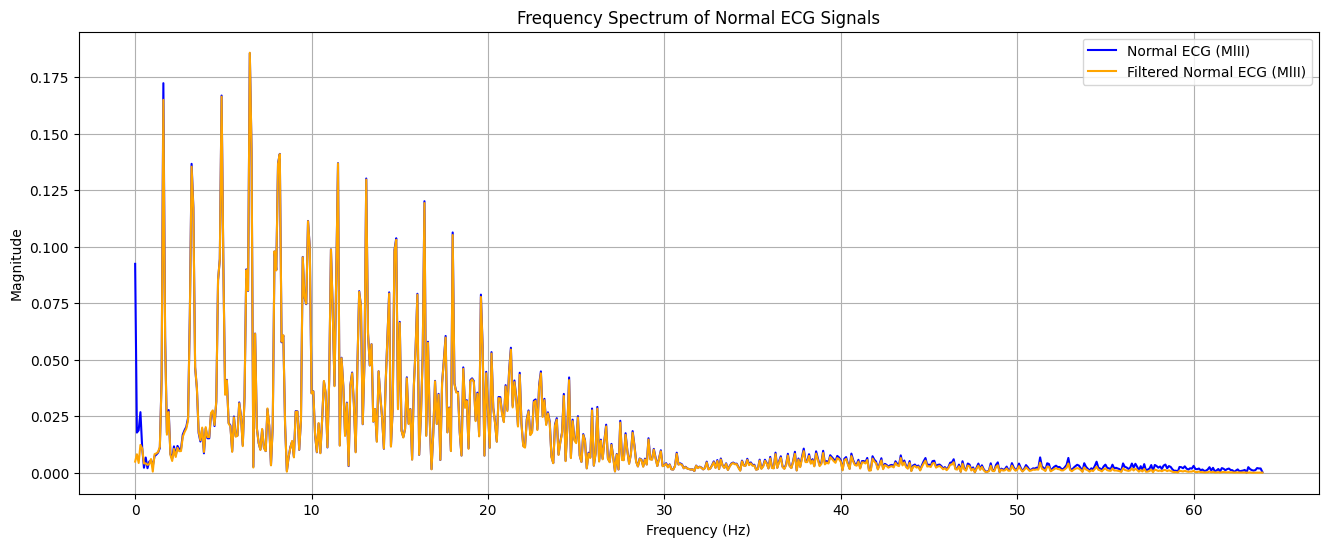

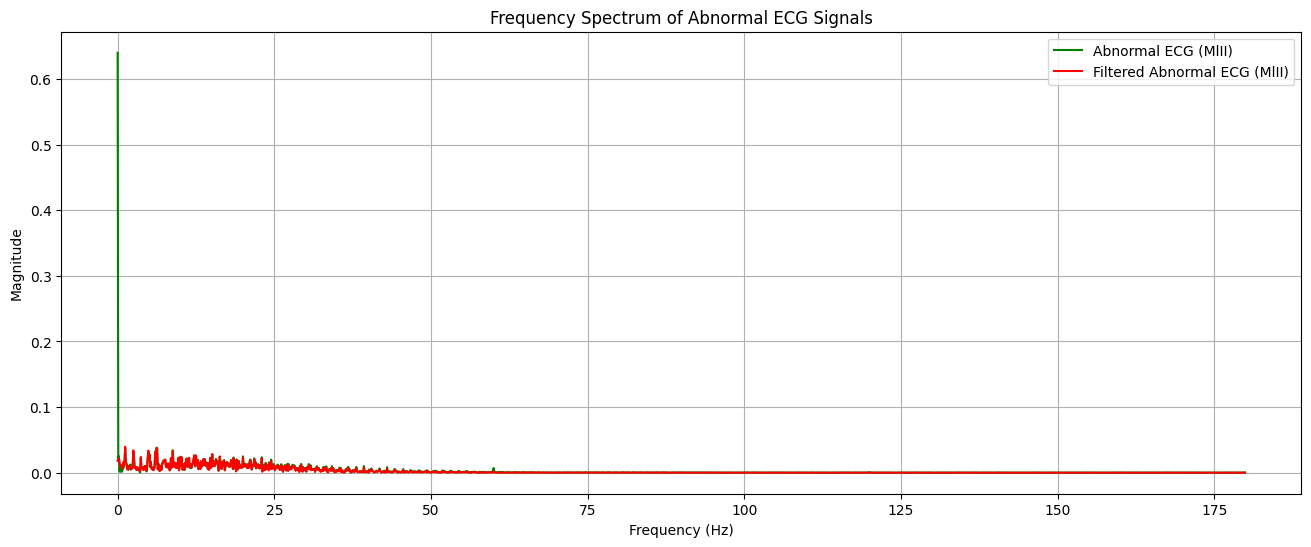

In [30]:
def plot_frequency_spectrum(signal, fs, title, color):
    T = 1.0 / fs
    yf = fft(signal)
    xf = fftfreq(len(signal), T)[:len(signal) // 2]
    plt.plot(xf, 2.0 / len(signal) * np.abs(yf[:len(signal) // 2]), color=color, label=title)

def plot_normal_ecg_spectra(sampling_rate):
    plt.figure(figsize=(16, 6))

    plot_frequency_spectrum(MlII_normal, sampling_rate, 'Normal ECG (MlII)', 'blue')
    plot_frequency_spectrum(filtered_bandpass_normal, sampling_rate, 'Filtered Normal ECG (MlII)', 'orange')

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Frequency Spectrum of Normal ECG Signals')
    plt.legend()
    plt.grid()
    plt.show()

def plot_abnormal_ecg_spectra(sampling_rate):
    plt.figure(figsize=(16, 6))

    plot_frequency_spectrum(MlII_UBnormal, sampling_rate, 'Abnormal ECG (MlII)', 'green')
    plot_frequency_spectrum(filtered_bandpass_abnormal, sampling_rate, 'Filtered Abnormal ECG (MlII)', 'red')

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Frequency Spectrum of Abnormal ECG Signals')
    plt.legend()
    plt.grid()
    plt.show()

plot_normal_ecg_spectra(sampling_rate_normal)
plot_abnormal_ecg_spectra(sampling_rate_abnormla)

```
MLII Normal filter
Bandpass Low 0.5hz dan High 50hz
filter yang memotong frekuensi di bawah 0.5 Hz, kita bisa menghilangkan baseline drift, sehingga sinyal jantung, bandpass juga berguna menjaga informasi penting Seperti dari rentang 0.5 hinggan 30hz karena menurut saya itu merupakan sinyal yang penting


MLII Abnormal Filter
Bandstop Cutoff lower 59 Hz upper 61 Hz
dilakukan karena interferensi listrik pada 59–61 Hz merupakan noise umum yang sering terjadi pada sinyal biomedis. Ini berasal dari jaringan listrik di wilayah dengan frekuensi listrik 60 Hz.

bandpass filter 0.5 Hz - 50 Hz
Digunakan untuk menjaga energi sinyal di rentang 0.5–60 Hz sambil menghilangkan noise, pada <0.5 hz terjadinya baseline drift
```

### **Signal-to-Noise Ratio (SNR)**

**Signal-to-Noise Ratio (SNR)** digunakan untuk mengukur seberapa kuat sinyal yang diinginkan dibandingkan dengan tingkat kebisingan pada sinyal. Dalam kode di atas, SNR dihitung setelah proses filtering dengan membandingkan energi sinyal asli dan energi kebisingan.

Rumus untuk menghitung SNR setelah filtering adalah sebagai berikut:

1. **Noise** dihitung sebagai selisih antara sinyal asli dan sinyal yang sudah difilter:

$$
\text{noise} = x_{\text{raw}} - x_{\text{filtered}}
$$

2. **Energi Sinyal** dihitung sebagai jumlah kuadrat dari sinyal yang sudah difilter:

$$
E_{\text{signal}} = \sum x_{\text{filtered}}^2
$$

3. **Energi Kebisingan** dihitung sebagai jumlah kuadrat dari kebisingan:

$$
E_{\text{noise}} = \sum \text{noise}^2
$$

4. **SNR** dihitung dengan rumus:

$$
\text{SNR} = 10 \cdot \log_{10}\left(\frac{E_{\text{signal}}}{E_{\text{noise}}}\right)
$$

Jika energi kebisingan sama dengan nol (misalnya, tidak ada kebisingan), maka nilai **SNR** akan sangat besar dan dianggap tak terhingga:

$$
\text{SNR} = \infty \quad \text{jika} \quad E_{\text{noise}} = 0
$$

### **Ringkasan Rumus SNR**:

1. **Noise**:
   $$
   \text{noise} = x_{\text{raw}} - x_{\text{filtered}}
   $$

2. **Energi Sinyal**:
   $$
   E_{\text{signal}} = \sum x_{\text{filtered}}^2
   $$

3. **Energi Kebisingan**:
   $$
   E_{\text{noise}} = \sum \text{noise}^2
   $$

4. **SNR**:
   $$
   \text{SNR} = 10 \cdot \log_{10}\left(\frac{E_{\text{signal}}}{E_{\text{noise}}}\right)
   $$

Jika \( E_{\text{noise}} = 0 \), maka:
$$
\text{SNR} = \infty
$$


In [31]:
def calculate_snr_filtered(raw_signal, filtered_signal):

    noise = raw_signal - filtered_signal

    signal_energy = np.sum(filtered_signal**2)
    noise_energy = np.sum(noise**2)

    if noise_energy == 0:
        return np.inf
    snr = 10 * np.log10(signal_energy / noise_energy)
    return snr

snr_normal=calculate_snr_filtered(MlII_normal,filtered_bandpass_normal)
snr_ubnormal=calculate_snr_filtered(MlII_UBnormal,filtered_bandpass_abnormal)
print(f"SNR normal setelah filtering (dB): {snr_normal:.2f}")
print(f"SNR abnromal setelah filtering (dB): {snr_ubnormal:.2f}")


SNR normal setelah filtering (dB): 16.12
SNR abnromal setelah filtering (dB): -5.78


```
SNR (Signal-to-Noise Ratio) mengukur seberapa dominan sinyal dibandingkan noise dalam suatu data.
SNR Normal= SNR pada sinyal ECG normal untuk Energi sinyal Lebih dominan mungkin karena sinyal ECG normal lebih jelas dan memiliki pola yang dapat dikenali (gelombang P, QRS, dan T). Struktur ini memberikan energi sinyal yang lebih tinggi dibandingkan noise.
SNR Abnormal= SNR pada sinyal ECG Abnormal sendiri Noise Terindikasi masih lebih dominan . mungkin Sinyal abnormal lebih sulit dipisahkan dari noise dibandingkan sinyal normal karena pola yang tidak teratur dan Amplitudo yang lebih kecil.
```

### **Normalisasi**

### **Normalisasi Sinyal dengan Min-Max Scaling**

Min-Max Scaling digunakan untuk mengubah nilai sinyal sehingga berada dalam rentang [0, 1]. Proses ini mengubah nilai sinyal dengan menggunakan rumus berikut:

$$
x_{\text{norm}} = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}
$$

Di mana:
- \( x \) adalah nilai asli dari sinyal,
- \( \text{min}(x) \) adalah nilai minimum dari sinyal,
- \( \text{max}(x) \) adalah nilai maksimum dari sinyal,
- \( x_{\text{norm}} \) adalah nilai sinyal yang sudah dinormalisasi.

#### **Proses Normalisasi**:

1. **Normalisasi untuk Sinyal Normal (Normal ECG)**:
   - Reshape sinyal agar sesuai dengan format input dari MinMaxScaler.
   - Gunakan `scaler.fit()` untuk menentukan batas minimum dan maksimum dari sinyal normal.
   - Terapkan normalisasi dengan `scaler.transform()`.

2. **Normalisasi untuk Sinyal Abnormal (Abnormal ECG)**:
   - Sama seperti sinyal normal, reshape dan normalisasi sinyal abnormal menggunakan MinMaxScaler.

### **Ringkasan Rumus Normalisasi**:

$$
x_{\text{norm}} = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}
$$


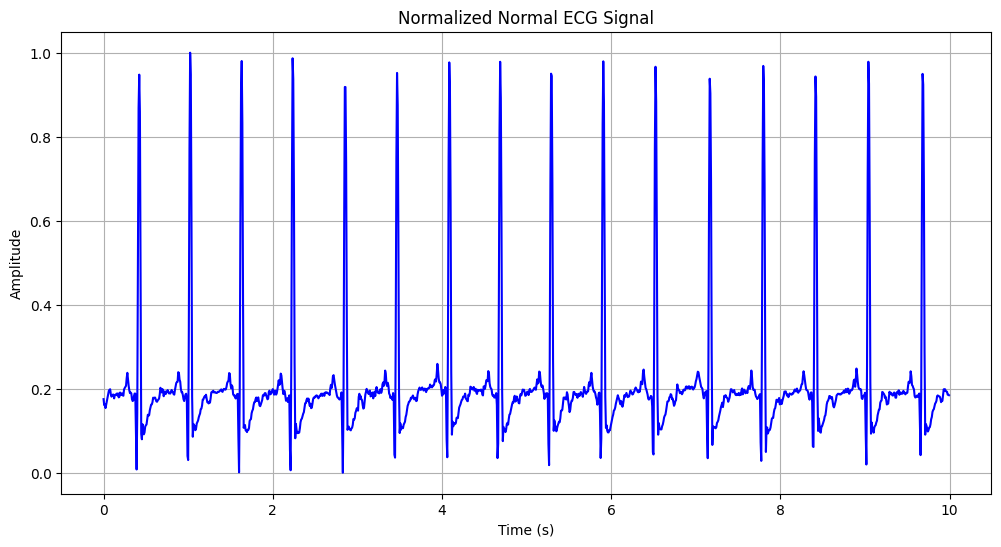

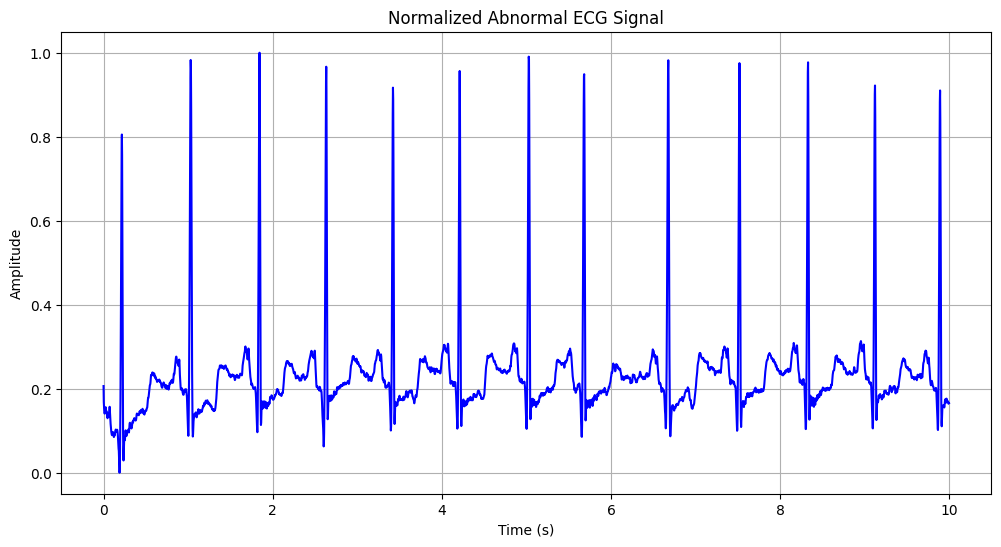

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def plot_signal(signal, fs, title):
    t = np.arange(len(signal)) / fs
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, color='blue')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

filtered_normal = np.array(filtered_bandpass_normal)
filtered_abnormal = np.array(filtered_bandpass_abnormal)

scaler = MinMaxScaler()

filtered_normal = filtered_normal.reshape(-1, 1)
scaler.fit(filtered_normal)
ECG_Norm_Normal = scaler.transform(filtered_normal).flatten()

filtered_abnormal = filtered_abnormal.reshape(-1, 1)
scaler.fit(filtered_abnormal)
ECG_Norm_Abnormal = scaler.transform(filtered_abnormal).flatten()

# Plot hasil normalisasi
plot_signal(ECG_Norm_Normal, sampling_rate_normal, "Normalized Normal ECG Signal")
plot_signal(ECG_Norm_Abnormal, sampling_rate_abnormla, "Normalized Abnormal ECG Signal")


```
Setelah melakukan Filterisasi dengan mengunakan Lower pass,
bandstop, dan bandpass, setelah itu melaukan normalisasi dengan metode MInMax scala.
Dilihat Pada grafik, sinyal ECG yang telah dinormalisasi menunjukkan pola yang identik dengan sinyal awal, tetapi amplitudo telah diskalakan antara 0 dan 1.

```

### dst

## Ekstraksi Fitur

```
Jelaskan fitur apa yang ingin diekstraksi dan mengapa. Berikan statement pendukung dari artikel terkait
Kelompok kami untuk melakukan fitur ektraksi dari sinyal ECG ini mengunakan Metode algoritma berbasis local maximum detection Deteksi puncak dilakukan dengan mencari nilai dalam array yang lebih besar dari nilai di titik sebelum dan sesudahnya.
berikut ini fitur-fitur yang bisa diambil dari sinyal ECG Normal dan Abnormal
R-Peaks= nilai puncak dari sinyal Ecg jadi nilai yang biasanya dicari pertama untuk analisis sinyal ECG, R-peaks sendiri biasanya gelombang paling tinggi di sinyal ECG.

R-R interval=  merupakan jarak antara segmen R pertama ke segmen Rselanjutnya. interval RR menunjukkan waktu antara setiap detak jantung yang terdeteksi, diukur dari puncak (R) ke puncak (R) pada  kompleks QRS.

Q-peaks= fitur ini merupakan bagian dari qrs compleks Gelombang negatif di awal kompleks QRS, jadi lembah sebelum puncak besar dari QRS complex.

S-Peaks= fitur ini merupakan bagian dari qrs complex yang di definisikan sebagai lokasi di mana kemiringan menunjukkan perpotongan nol negatif pertama ke nol positif. jadi turunan tajam setelah  r-peak dilalui pada gelombang.

BPM=Beat Per Menit merupakan jumlah detak jantung dalam satu menit. Nilai heart rate (bpm) diperoleh dari interval R-R interval. denyut jatung di ukur melalui BPM satuan Beat per menit ( bpm ).Denyut Jantung manusia dewasa normal saat istirahat berkisar antara 60–100 bpm . Takikardia adalah Denyut Jantung yang cepat, didefinisikan sebagai di atas 100 bpm saat istirahat . Bradikardia adalah Denyut Jantung yang lambat , didefinisikan sebagai di bawah 60 bpm saat istirahat . Selama tidur, detak jantung yang lambat dengan laju sekitar 40–50 bpm adalah hal yang umum dan dianggap normal. Ketika jantung tidak berdetak dalam pola yang teratur, ini disebut sebagai aritmia . Kelainan denyut jantung ini terkadang mengindikasikan penyakit .



QRS Complexs= QRS Komplek merupakan nilai-nilai dari segmen Q, segmen R dan segmen R.QRS adalah interval waktu dari awal hingga akhir kompleks QRS. Kompleks QRS yang pendek diinginkan karena menunjukkan bahwa ventrikel terdepolarisasi dengan cepat, yang mengindikasikan bahwa sistem konduksi berfungsi dengan baik. Sebaliknya, kompleks QRS yang lebar (juga disebut sebagai kompleks QRS yang luas) menunjukkan bahwa depolarisasi ventrikel berlangsung lambat, yang mungkin disebabkan oleh disfungsi dalam sistem konduksi.

Q-R Interval =merupakan jarak antara segmen Q ke segmen R dalam satu detak
jantung.
```

untuk Sumber pendukung sendiri= https://pmc.ncbi.nlm.nih.gov/articles/PMC9514660/pdf/pone.0274225.pdf & https://repository.its.ac.id/49236/7/2215205006-Master_Tesis.pdf

rr-interva= (Menurut=https://support.hexoskin.com/difference-between-rr-interval-and-nn-interval)

qrs comlexs=(Menurut=https://ecgwaves.com/topic/ecg-normal-p-wave-qrs-complex-st-segment-t-wave-j-point/)

BPM=(Menurut=https://www.brainsigns.com/en/science/s2/technologies/hr)



In [33]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import find_peaks

def calculate_parameters(ecg_data):
    max_amplitude = np.max(ecg_data)
    min_amplitude = np.min(ecg_data)
    height = (max_amplitude + min_amplitude) / 2

    peaks, _ = find_peaks(ecg_data, height=height)
    if len(peaks) > 1:
        distances = np.diff(peaks)
        distance = int(np.mean(distances))
    else:
        distance = 100

    return height, distance

def plot_ecg_with_r_peaks(ecg_data, r_peaks, fs, title):
    times = np.arange(ecg_data.shape[0], dtype='float') / fs
    ymin = np.min(ecg_data)
    ymax = np.max(ecg_data)

    plt.figure(figsize=(15, 5))
    plt.plot(times, ecg_data, label='ECG Signal')
    plt.vlines([r / fs for r in r_peaks], ymin, ymax,
               color="r", linewidth=2, label='Detected R Peaks')
    plt.xlabel("Time (s)")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

### Fitur 1

In [34]:
def detect_r_peaks(ecg_data, height=None, distance=None):
    peaks, _ = find_peaks(ecg_data, height=height, distance=distance)
    return peaks

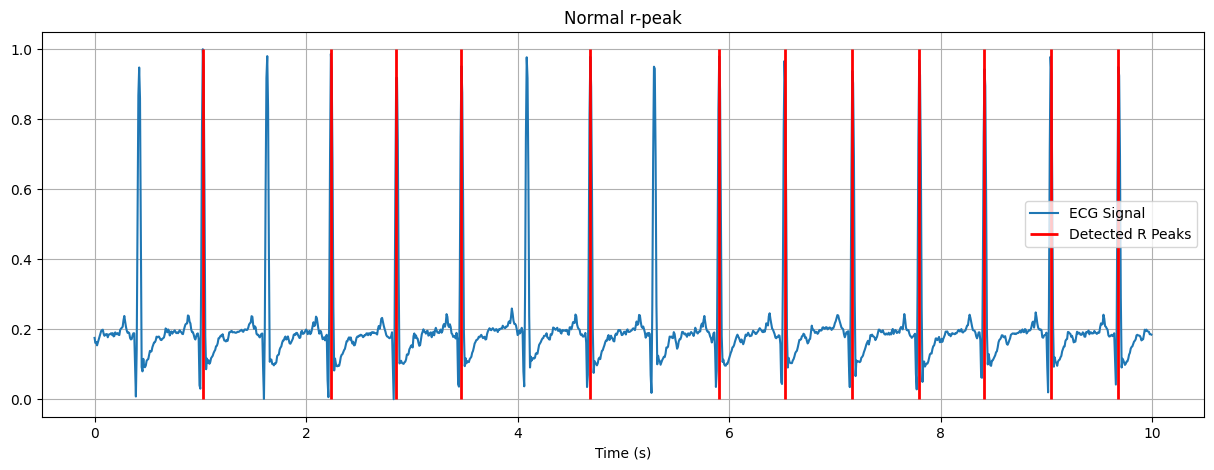

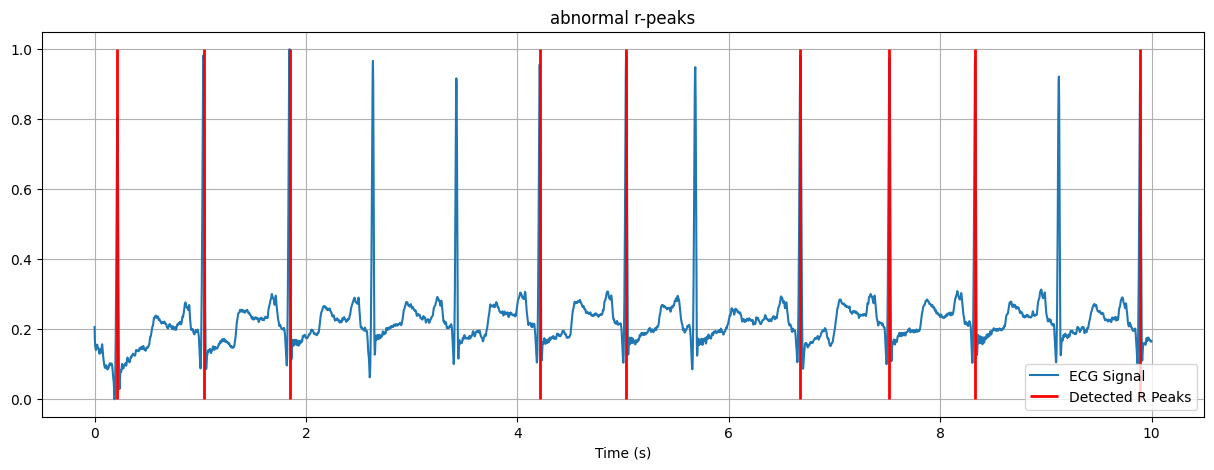

threshold_normal 0.49999999999999994
threshold_abnormal 0.49999999999999994


In [35]:
height_normal, distance_normal = calculate_parameters(ECG_Norm_Normal)
height_abnormal, distance_abnormal = calculate_parameters(ECG_Norm_Abnormal)
r_peaks_normal = detect_r_peaks(ECG_Norm_Normal, height=height_normal, distance=distance_normal)
r_peaks_abnormal = detect_r_peaks(ECG_Norm_Abnormal, height=height_abnormal, distance=distance_abnormal)
ECGplotnorm=plot_ecg_with_r_peaks(ECG_Norm_Normal,r_peaks_normal,sampling_rate_normal,'Normal r-peak')
ECGplotabnorm=plot_ecg_with_r_peaks(ECG_Norm_Abnormal,r_peaks_abnormal,sampling_rate_abnormla,'abnormal r-peaks')
ECGplotnorm
ECGplotabnorm
print(f'threshold_normal {height_normal}')
print(f'threshold_abnormal {height_abnormal}')

fitur plot diatas adalah R-peaks yang dihasil dari Threshold 0.49/ 0.5

untuk Threshold pada sinyal ECG yang mengunakan Metode FFT(Fast Fourier Transform) maka dari untuk pencarian Thresholding itu mengunakan analisis secara Empiris engan mengamati spektrum frekuensi dan amplitudo sinyal, kami memberikan


### Fitur 2

In [36]:
def extract_rr_intervals(r_peaks):
    rr_intervals = np.diff(r_peaks)
    return rr_intervals
def extract_basic_features(ecg_data, r_peaks, sampling_rate):
    features = {}
    rr_intervals = extract_rr_intervals(r_peaks)

    features['mean_rr'] = np.mean(rr_intervals) if len(rr_intervals) > 0 else 0
    features['std_rr'] = np.std(rr_intervals) if len(rr_intervals) > 0 else 0
    features['num_r_peaks'] = len(r_peaks)
    mean_amplitude_volts = np.mean(ecg_data[r_peaks]) if len(r_peaks) > 0 else 0
    features['mean_amplitude_mV'] = mean_amplitude_volts * 1000
    rr_intervals_seconds = rr_intervals / sampling_rate  # Interval dalam detik
    heart_rate = 60 / np.mean(rr_intervals_seconds) if len(rr_intervals_seconds) > 0 else 0
    features['bpm'] = heart_rate

    return features

In [37]:
rr_interval_fitur=extract_basic_features(ECG_Norm_Normal,r_peaks_normal,sampling_rate_normal)
rr_interval_abnormal_fitur=extract_basic_features(ECG_Norm_Abnormal,r_peaks_abnormal,sampling_rate_abnormla)
rr_interval=extract_rr_intervals(r_peaks_normal)
rr_interval_abnormal=extract_rr_intervals(r_peaks_abnormal)
print(f'Sinyal Normal:\n{rr_interval}')
print(f'Sinyal Abormal:\n{rr_interval_abnormal}')
print(f'Sinyal Normal:\n{rr_interval_fitur}')
print(f'Sinyal Abormal:\n{rr_interval_abnormal_fitur}')

Sinyal Normal:
[155  79  79 156 156  79  82  81  79  80  82]
Sinyal Abormal:
[293 293 852 294 594 303 292 562]
Sinyal Normal:
{'mean_rr': 100.72727272727273, 'std_rr': 33.6616612486153, 'num_r_peaks': 12, 'mean_amplitude_mV': 963.3150848255628, 'bpm': 76.24548736462093}
Sinyal Abormal:
{'mean_rr': 435.375, 'std_rr': 197.920399087613, 'num_r_peaks': 9, 'mean_amplitude_mV': 953.2778140368259, 'bpm': 49.61240310077519}


Fitur R-R Interval dan langsung melaukan perhitungan BPM pada jantung

### Fitur 3

In [38]:
def detect_q_peaks(ecg_data, r_peaks):
    q_peaks = []
    for r in r_peaks:
        if r > 30:
            q = np.min(ecg_data[r - 30:r])
            q_index = np.where(ecg_data[:r] == q)[0][-1]
            q_peaks.append(q_index)
    return q_peaks

def detect_s_peaks(ecg_data, r_peaks):
    s_peaks = []
    for r in r_peaks:
        if r < len(ecg_data) - 30:
            s = np.min(ecg_data[r:r + 30])
            s_index = np.where(ecg_data[r:] == s)[0][0] + r
            s_peaks.append(s_index)
    return s_peaks



In [39]:
q_peaks_normal = detect_q_peaks(ECG_Norm_Normal, r_peaks_normal)
s_peaks_normal= detect_s_peaks(ECG_Norm_Normal, r_peaks_normal)
q_peaks_abnomal = detect_q_peaks(ECG_Norm_Abnormal, r_peaks_abnormal)
s_peaks_abnormal= detect_s_peaks(ECG_Norm_Abnormal, r_peaks_abnormal)

print(q_peaks_normal)
print(s_peaks_normal)
print(q_peaks_abnomal)
print(s_peaks_abnormal)

[128, 283, 362, 441, 596, 752, 832, 914, 995, 1074, 1154, 1236]
[135, 290, 374, 448, 604, 764, 839, 921, 1002, 1085, 1161, 1243]
[68, 361, 655, 1506, 1801, 2393, 2697, 2989, 3552]
[85, 380, 670, 1523, 1817, 2413, 2714, 3005, 3568]


Q-Peaks dan S-Peaks

### Fitur 3

In [40]:
def extract_qrs_complex(ecg_data, r_peaks, sampling_rate):
    q_peaks = detect_q_peaks(ecg_data, r_peaks)
    s_peaks = detect_s_peaks(ecg_data, r_peaks)
    qrs_complex = list(zip(q_peaks, r_peaks, s_peaks))
    qrs_intervals = [s - q for q, r, s in qrs_complex]
    qrs_intervals_ms = [interval * 1000 / sampling_rate for interval in qrs_intervals]
    mean_qrs_interval_ms = sum(qrs_intervals_ms) / len(qrs_intervals_ms) if qrs_intervals_ms else 0

    return qrs_complex, qrs_intervals_ms, mean_qrs_interval_ms
def plot_qrs_complex(ecg_data, qrs_complex, fs):
    times = np.arange(ecg_data.shape[0]) / fs
    plt.figure(figsize=(15, 5))
    plt.plot(times, ecg_data, label='ECG Signal')

    for (q, r, s) in qrs_complex:
        # Plot Q, R, S
        plt.scatter(r / fs, ecg_data[r], color='red', label='R Peak' if r == qrs_complex[0][1] else "")
        plt.scatter(q / fs, ecg_data[q], color='blue', label='Q Peak' if q == qrs_complex[0][0] else "")
        plt.scatter(s / fs, ecg_data[s], color='green', label='S Peak' if s == qrs_complex[0][2] else "")

    plt.title('ECG Signal with QRS Complex')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (mV)')
    plt.legend()
    plt.grid()
    plt.show()

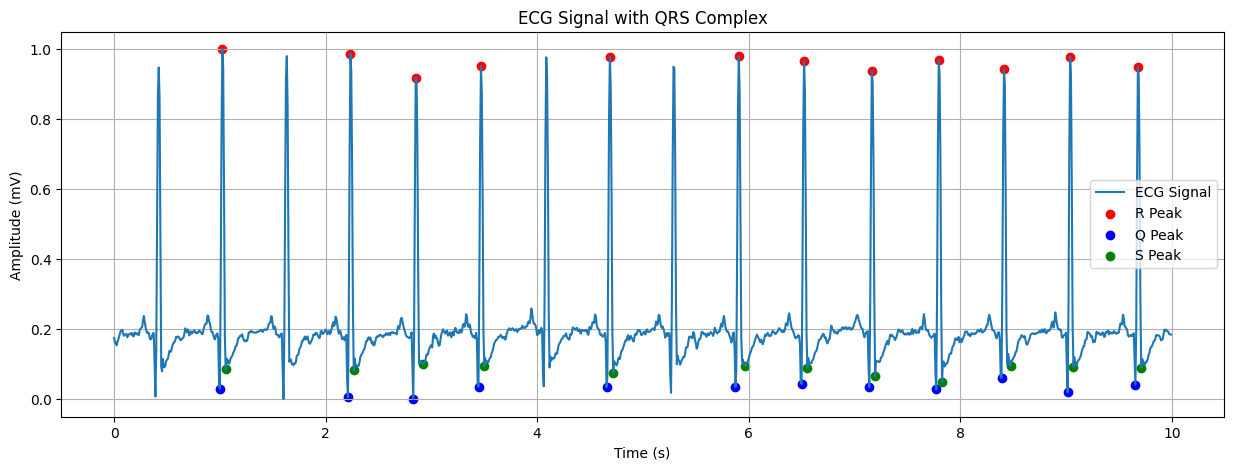

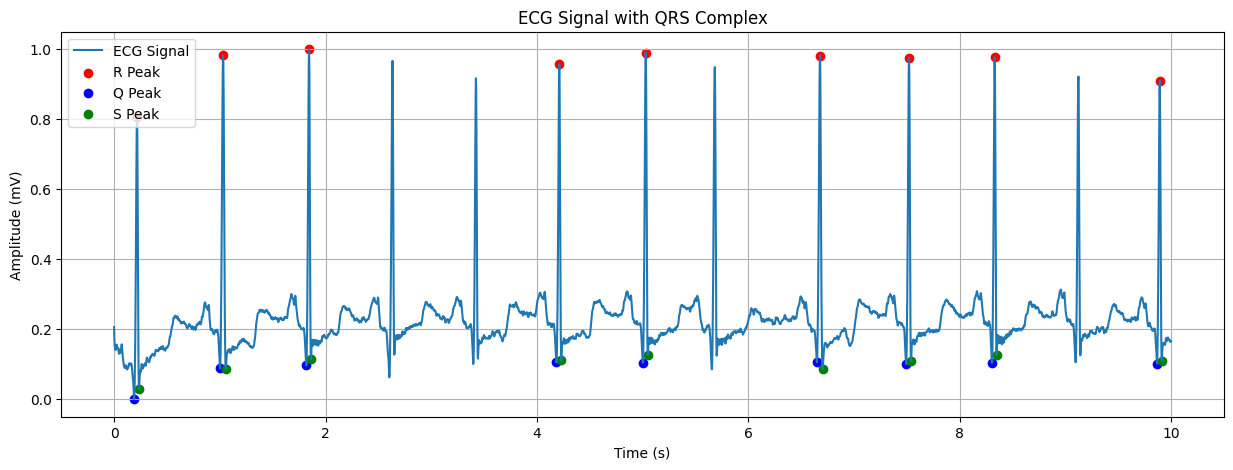

QRS NORMAL 64.453125 m/s
QRS   ABNORMAL 47.22222222222222 m/s


In [41]:
qrs_complex_normal,qrs_intervals_ms_normal,mean_qrs_normal= extract_qrs_complex(ECG_Norm_Normal, r_peaks_normal, sampling_rate_normal)
qrs_complex_abnormal,qrs_intervals_ms_abnormal,mean_qrs_abnormal= extract_qrs_complex(ECG_Norm_Abnormal, r_peaks_abnormal, sampling_rate_abnormla)
plot_qrs_complex(ECG_Norm_Normal, qrs_complex_normal, sampling_rate_normal)

plot_qrs_complex(ECG_Norm_Abnormal, qrs_complex_abnormal, sampling_rate_abnormla)

print(f'QRS NORMAL {mean_qrs_normal} m/s')
print(f'QRS   ABNORMAL {mean_qrs_abnormal} m/s')

```
disini mungkin sebagai kendala dari kelompok kami dalam
melakukan pemfilteran yang masih kurang bersih dari noise yang
menyebabkan titik qrs yang salah
```

### Fitur 4

In [42]:
def extract_qr_intervals(ecg_data, r_peaks):
    q_r_intervals = []
    for r_peak in r_peaks:
        if r_peak > 20:  # Pastikan tidak keluar dari batas
            # Q adalah nilai minimum sebelum R
            q = np.min(ecg_data[r_peak - 20:r_peak])
            q_index = np.where(ecg_data[:r_peak] == q)[0][-1]
            q_r_intervals.append(r_peak - q_index)
    return np.mean(q_r_intervals) if q_r_intervals else 0
def plot_qr_intervals(ecg_data, r_peaks, fs):
    times = np.arange(ecg_data.shape[0]) / fs
    plt.figure(figsize=(15, 5))
    plt.plot(times, ecg_data, label='ECG Signal')

    for r_peak in r_peaks:
        if r_peak > 20:  # Pastikan ada cukup data sebelum R
            q = np.min(ecg_data[r_peak - 20:r_peak])  # Q adalah nilai minimum sebelum R
            q_index = np.where(ecg_data[r_peak - 20:r_peak] == q)[0][0] + (r_peak - 20)
            plt.scatter(q_index / fs, q, color='blue', label='Q Peak' if r_peak == r_peaks[0] else "")
            plt.axvline(x=q_index / fs, color='blue', linestyle='--', linewidth=0.5)  # Garis vertikal untuk Q

        plt.scatter(r_peak / fs, ecg_data[r_peak], color='red', label='R Peak' if r_peak == r_peaks[0] else "")
        plt.axvline(x=r_peak / fs, color='red', linestyle='--', linewidth=0.5)  #

    plt.title('ECG Signal with Q and R Intervals')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (mV)')
    plt.legend()
    plt.grid()
    plt.show()

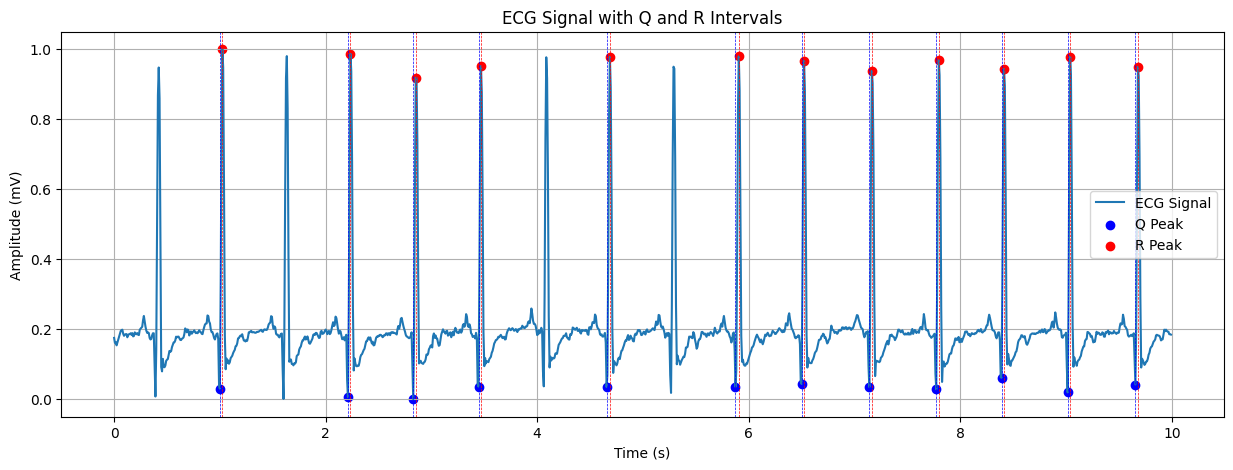

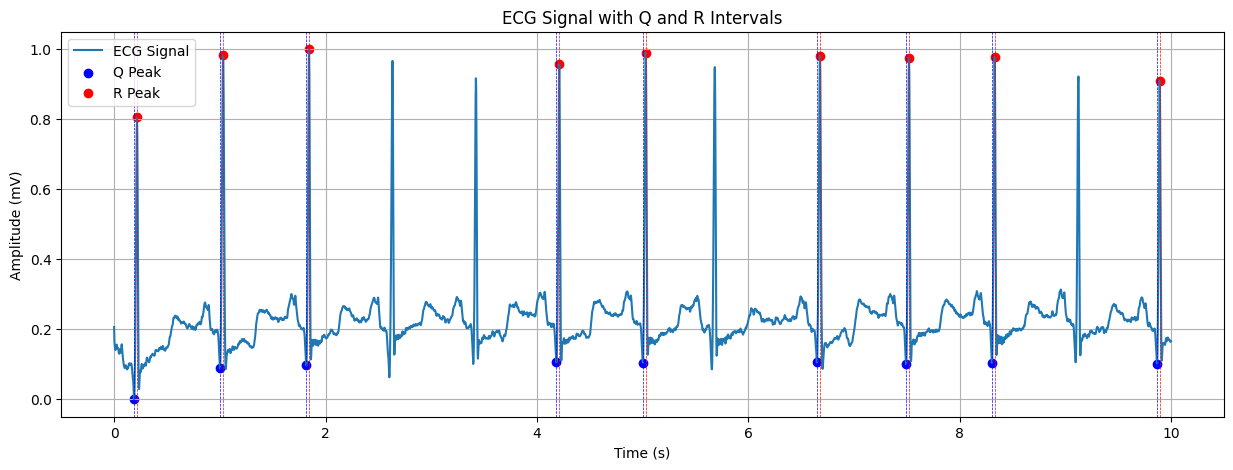

In [43]:
plot_qr_intervals(ECG_Norm_Normal, r_peaks_normal, sampling_rate_normal)
plot_qr_intervals(ECG_Norm_Abnormal, r_peaks_abnormal, sampling_rate_abnormla)

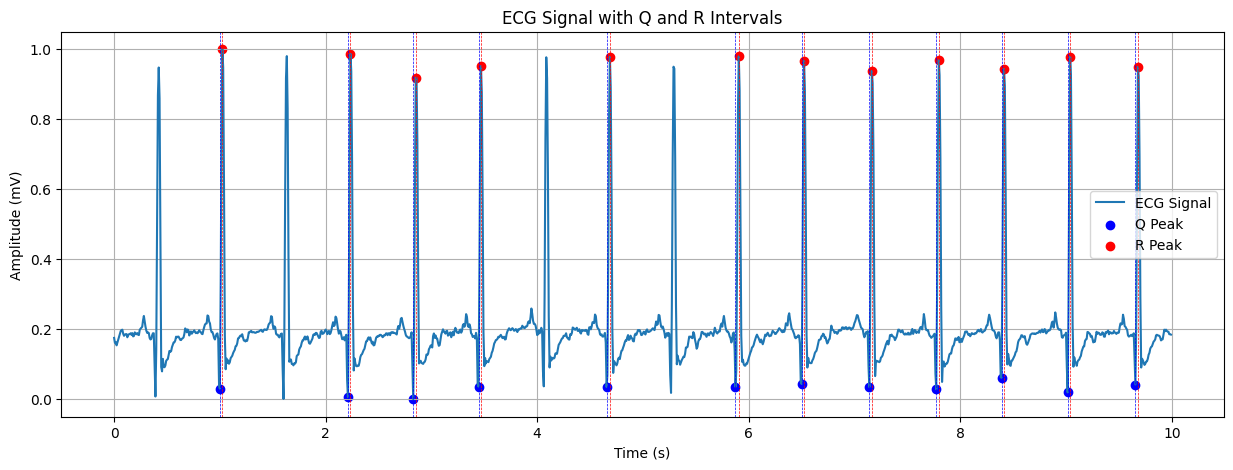

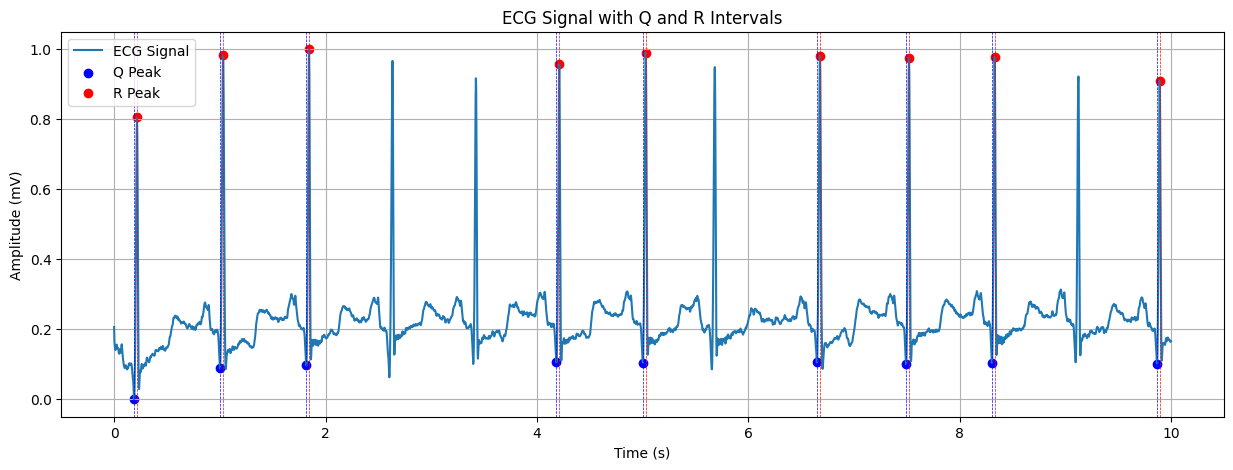

Interval Q-R Normal (jumlah sampel): 3.1666666666666665
Interval Q-R Normal (dalam waktu): 0.0247 detik
Interval Q-R Abnormal (jumlah sampel): 9.777777777777779
Interval Q-R Abnormal (dalam waktu): 0.0088 detik


In [44]:
qr_interval_norm= extract_qr_intervals(ECG_Norm_Normal, r_peaks_normal)
qr_interval_abnormal= extract_qr_intervals(ECG_Norm_Abnormal, r_peaks_abnormal)
plot_qr_intervals(ECG_Norm_Normal, r_peaks_normal, sampling_rate_normal)
plot_qr_intervals(ECG_Norm_Abnormal, r_peaks_abnormal, sampling_rate_abnormla)
qr_interval_time_norm = qr_interval_norm / sampling_rate_normal
qr_interval_time_abnorm= qr_interval_norm / sampling_rate_abnormla

# Cetak hasil
print(f"Interval Q-R Normal (jumlah sampel): {qr_interval_norm}")
print(f"Interval Q-R Normal (dalam waktu): {qr_interval_time_norm:.4f} detik")
print(f"Interval Q-R Abnormal (jumlah sampel): {qr_interval_abnormal}")
print(f"Interval Q-R Abnormal (dalam waktu): {qr_interval_time_abnorm:.4f} detik")

Sinyal Interval Q-R

## Analisis

jelaskan langkah-langkah dan hasil analisis dari pengolahan sinyal tersebut. Analisis dapat berupa:
*   Perbandingan kondisi normal dan abnormal
*   Signal-to-Noise-Ratio
*   Sinyal sebelum dan sesudah treatment
*   dst

sesuaikan dengan tujuan pengolahan sinyal



### Analisis 1

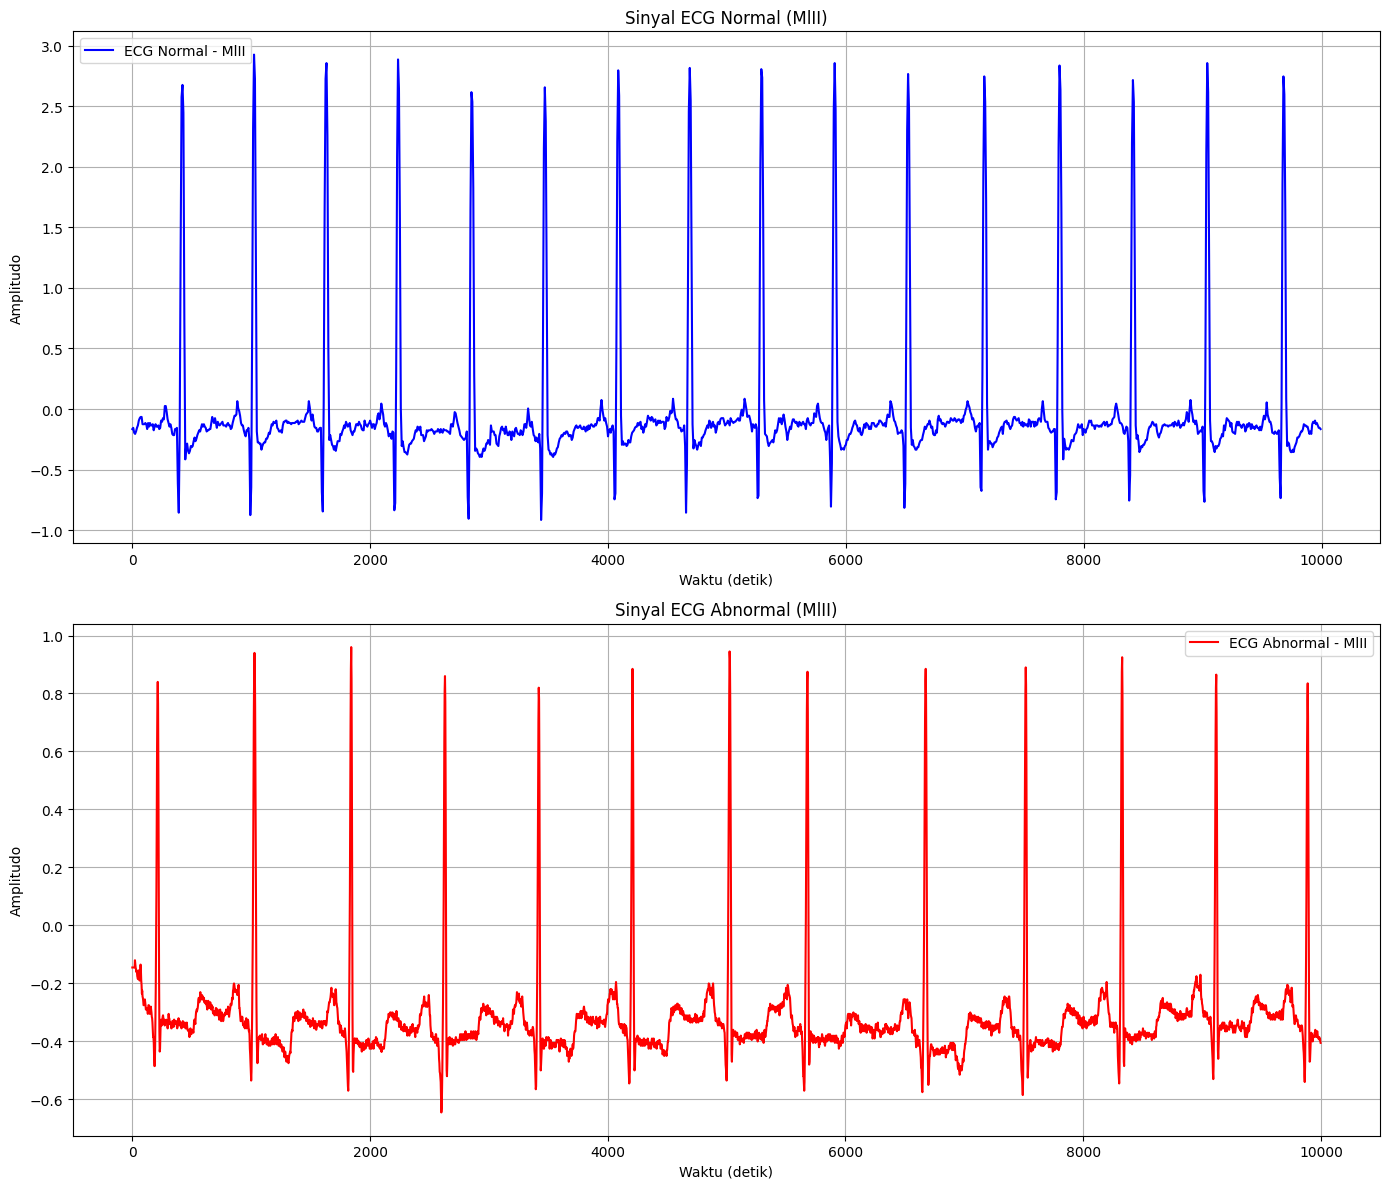

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))
plt.subplot(2, 1, 1)
plt.plot(t2, MlII_normal, label="ECG Normal - MlII", color='blue')
plt.title("Sinyal ECG Normal (MlII)")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.grid()
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t1, MlII_UBnormal, label="ECG Abnormal - MlII", color='red')
plt.title("Sinyal ECG Abnormal (MlII)")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


```
Perbedaan sinyal ECG Normal(sinus) dan sinyal ECG abnormal dari domain waktu
sinyal Normal menunjukkan pola yang teratur dan stabil, dengan amplitudo yang bervariasi antara -1 hingga 3 dan ditandai dengan gelombang P yang muncul sebelum setiap puncak R, menunjukan perubahan/ depolarisasi ventrikel yang teratur dikikuti dengan gelombang S dan pada gelombang Gelombang T, yang merepresentasikan repolarisasi ventrikel, juga terlihat halus dan teratur.
Sinyal ECG Abnormal(Arrthymia) pola yang tidak  dan menunjukan amplitudo yang bervariasi antara - 0.5 hingga 0.8, dan fluktuasi yang signifikan dalam amplitudo.Gelombang P mungkin tidak terlihat jelas atau hilang pada beberapa detak,Gelombang S mungkin tidak selalu mengikuti puncak R dengan konsisten,Gelombang T mungkin terlihat tidak teratur.

ini menunjukan bahwa sinyal normal lebih terartur dalam gelombang P,Q,R,S,dan T usedangkan sinyal EKG abnormal menunjukkan ketidakaturan yang signifikan dan jatak R-R interval lebih jauh Abnormal dibandingkan Normal
```

#### Sesudah Filtered

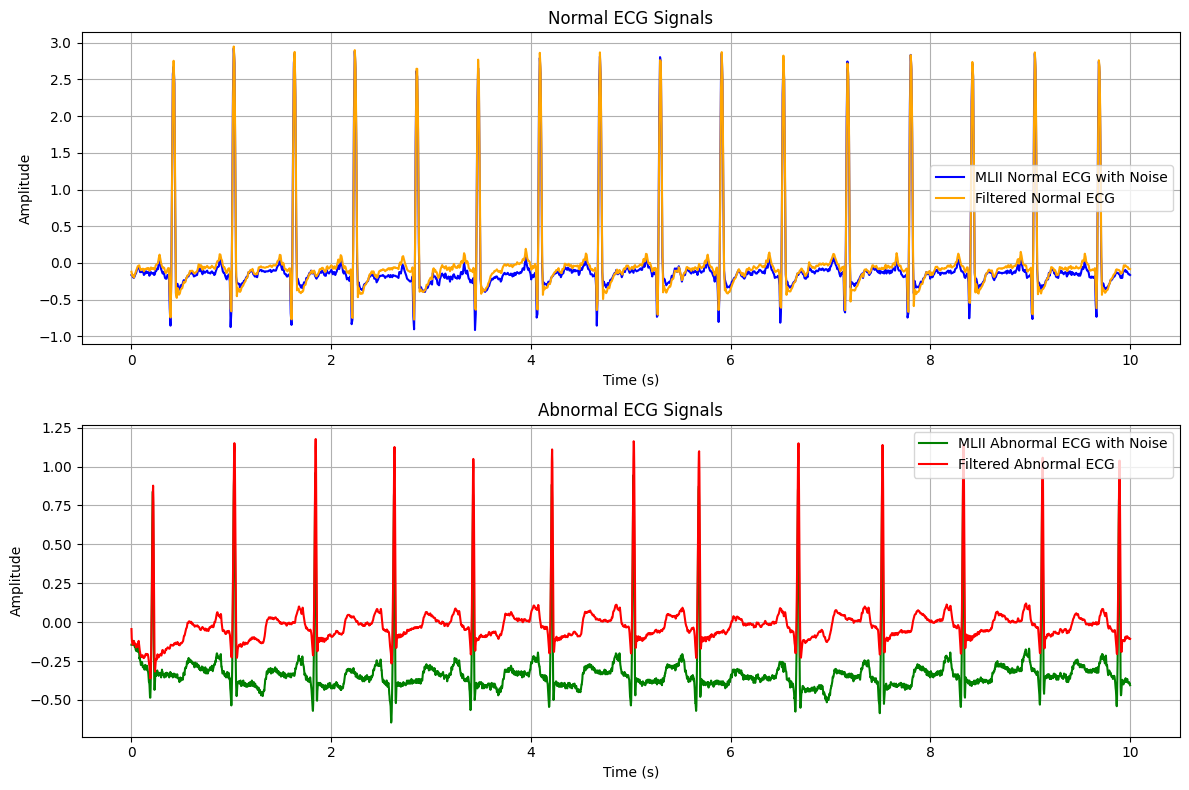

In [46]:
plt.figure(figsize=(12, 8))

# Subplot untuk sinyal normal
plt.subplot(2, 1, 1)
plt.plot(t_normal, MlII_normal, label='MLII Normal ECG with Noise', color='blue')
plt.plot(t_normal, filtered_bandpass_normal, label='Filtered Normal ECG', color='orange')
plt.title('Normal ECG Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

# Subplot untuk sinyal abnormal
plt.subplot(2, 1, 2)
plt.plot(t_abnormal, MlII_UBnormal, label='MLII Abnormal ECG with Noise', color='green')
plt.plot(t_abnormal, filtered_bandpass_abnormal, label='Filtered Abnormal ECG', color='red')
plt.title('Abnormal ECG Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

```
setelah di filter walaupun ada kendala untuk pemfiltrannya sendiri masih kurnag,
sinyal ECG normal menunjukan gelombang P,QRS,T menjadi lebih terdefinisikan
dan yang Abnorma untuk noise berhasil di minimalisir, Untuk pemfilteran
kedua sinyal sendiri masih kurnang maksimal karena untuk mendeteksi punca R-Peaks masih tidak terdeteksi semua.
Sinyal Normal menunjukan kejelasan puncak yang baik di bandingkan dengan Abnormal dan  sifat intrinsik dari sinyal normal yang lebih teratur dan terdefinisi, sedangkan sinyal abnormal mungkin memiliki variasi yang lebih besar dalam amplitudo dan durasi gelombang.
```

### Analisis 2

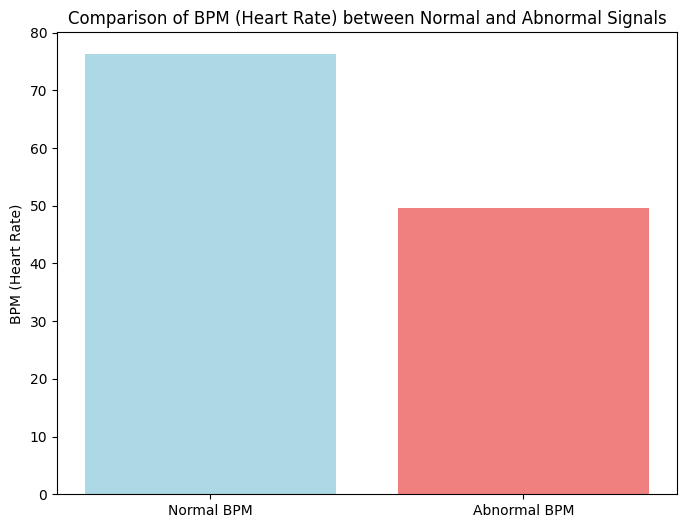

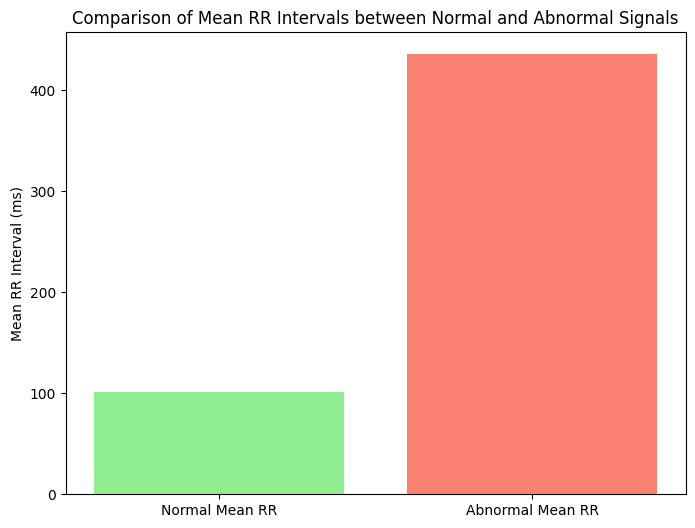

In [47]:
import matplotlib.pyplot as plt

# Data untuk analisis
features_normal = {
    'mean_rr': 100.72727272727273,
    'std_rr': 33.6616612486153,
    'num_r_peaks': 12,
    'mean_amplitude': 0.9633150848255628,
    'bpm': 76.24548736462093
}

features_abnormal = {
    'mean_rr': 435.375,
    'std_rr': 197.920399087613,
    'num_r_peaks': 9,
    'mean_amplitude': 0.9532778140368259,
    'bpm': 49.61240310077519
}

# Diagram bar untuk BPM (Heart Rate)
labels_bpm = ['Normal BPM', 'Abnormal BPM']
sizes_bpm = [features_normal['bpm'], features_abnormal['bpm']]

plt.figure(figsize=(8, 6))
plt.bar(labels_bpm, sizes_bpm, color=['lightblue', 'lightcoral'])
plt.title('Comparison of BPM (Heart Rate) between Normal and Abnormal Signals')
plt.ylabel('BPM (Heart Rate)')
plt.show()

# Diagram bar untuk Mean RR Interval
labels_rr = ['Normal Mean RR', 'Abnormal Mean RR']
sizes_rr = [features_normal['mean_rr'], features_abnormal['mean_rr']]

plt.figure(figsize=(8, 6))
plt.bar(labels_rr, sizes_rr, color=['lightgreen', 'salmon'])
plt.title('Comparison of Mean RR Intervals between Normal and Abnormal Signals')
plt.ylabel('Mean RR Interval (ms)')
plt.show()


Analisis Perbandingan
1. BPM (Heart Rate)
Sinyal Normal: BPM sebesar 76,2 (76%), yang menunjukkan detak jantung yang stabil dan dalam rentang normal.
Sinyal Abnormal: BPM sebesar 49,6 (24%), jauh lebih rendah dari sinyal normal, yang mengindikasikan kemungkinan kondisi bradikardia (detak jantung lambat).
2. Mean RR Interval
Sinyal Normal: Rata-rata interval RR adalah 100,7 ms (19%), yang mencerminkan kestabilan ritme jantung.
Sinyal Abnormal: Rata-rata interval RR adalah 435,4 ms (81%), yang sangat tinggi dibandingkan sinyal normal, menandakan jarak antar detak jantung yang tidak teratur atau melambat.

Kesimpulan:
Heart Rate (BPM) pada sinyal abnormal lebih rendah dari normal, menunjukkan detak jantung yang melambat.
Mean RR Interval yang jauh lebih tinggi pada sinyal abnormal dibandingkan normal menegaskan adanya perbedaan signifikan dalam kestabilan dan frekuensi detak jantung.
Secara keseluruhan, sinyal abnormal memperlihatkan pola yang tidak konsisten dan lebih lambat, yang dapat mengindikasikan gangguan pada sistem kardiovaskular

#### Analisis 4
```
Analisis Morfologi
Normalitas Interval Q-R:
Interval Q-R sebesar 0,0247 detik berada dalam kisaran yang wajar untuk sinyal ECG normal, di mana durasi QRS kompleks biasanya berkisar antara 0,06 - 0,12 detik.
Durasi ini mencerminkan waktu yang dibutuhkan impuls listrik untuk menyebar melalui ventrikel, menunjukkan aktivitas jantung yang sehat dan efisien.
Normalitas QRS Complek
Rata-rata QRS interval pada sinyal normal lebih pendek (16.90 ms). Hal ini menunjukkan bahwa impuls listrik jantung bergerak cepat melalui ventrikel, mencerminkan fungsi jantung yang efisien dan sehat.
Morfologi QRS pada sinyal normal cenderung teratur dengan amplitudo yang stabil, menandakan bahwa aktivitas depolarisasi ventrikel terjadi tanpa hambatan.
Abnormal Interval Q-R
Interval Q-R sebesar 0,0088 detik jauh lebih pendek daripada durasi normal. Ini menunjukkan adanya masalah dalam penghantaran impuls listrik dari atrium ke ventrikel, atau kemungkinan artefak pada sinyal.
Durasi yang sangat pendek ini dapat mengindikasikan konduksi yang terlalu cepat, seperti pada kondisi artefak sinyal akibat noise.
Abnormal Interval QRS comlexs
Rata-rata QRS interval lebih panjang (22.84 ms), menunjukkan adanya perlambatan konduksi listrik di ventrikel. Hal ini bisa disebabkan oleh berbagai faktor seperti blok cabang berkas (bundle branch block) atau hipertrofi ventrikel.
Pada sinyal abnormal, QRS bisa menunjukkan deformitas seperti pelebaran gelombang atau perubahan amplitudo, yang merupakan indikasi adanya gangguan pada jalur listrik jantung.
```

### dst

## Kesimpulan

```
berdasarkan hasil analisis,
kesimpulan yang bisa didapatkan dalam Sinyal ECG Normal dan Abnormal adalah adanya perbedaan yang signifikan Kesimpulan dari perbandingan
Sinyal ECG Normal dan Ubnormal perbedaan terjadi pada gelombang P,Q,R,S, dan T gelombang ECG normal lebih teratur dan Ubnormal tidak terlalu teratur,
terlihat sekali pada gelombang P yang  fluktuasi kecil pada domain waktu dan Interval R-R  dan Interval Q-R, dan
Beat Per Minute denyut lebih lambat pada sinyal ECG Ubnormal, tetapi ini juga menajdi kendala karena Filter belum menemukan Cut off yang tepat atau Metode Filter yang Cocok.

pada sinyal abnormal,  Beat Per Minute (BPM) menunjukkan denyut yang lebih lambat dibandingkan sinyal normal,
 yang dapat mengindikasikan kelainan konduksi atau aktivitas listrik jantung yang tidak efisien.
 Namun, analisis lebih lanjut perlu dilakukan karena terdapat kendala dalam menemukan parameter cut-off yang tepat atau metode filter yang sesuai untuk memproses sinyal ECG dengan optimal.
 Hal ini menunjukkan perlunya optimalisasi algoritma filtrasi untuk meningkatkan kualitas sinyal dan akurasi deteksi fitur pada sinyal ECG abnormal.
```